<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/21_Neural_Nets_and_Deep_Learning_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Keras TF 2.0 - Code Along Classification Project**

Let's explore a classification task with Keras API for TF 2.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/cancer_classification.csv")

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**EDA**


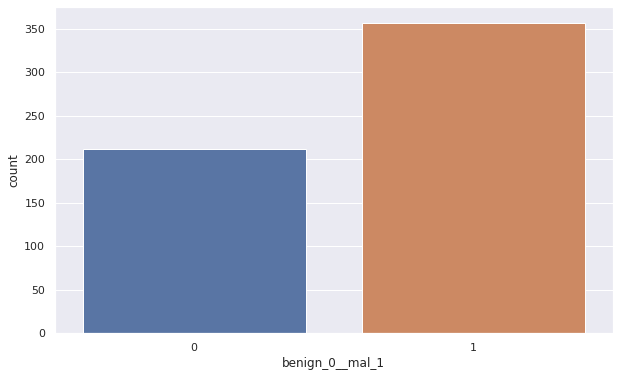

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='benign_0__mal_1',data=df)
plt.show()

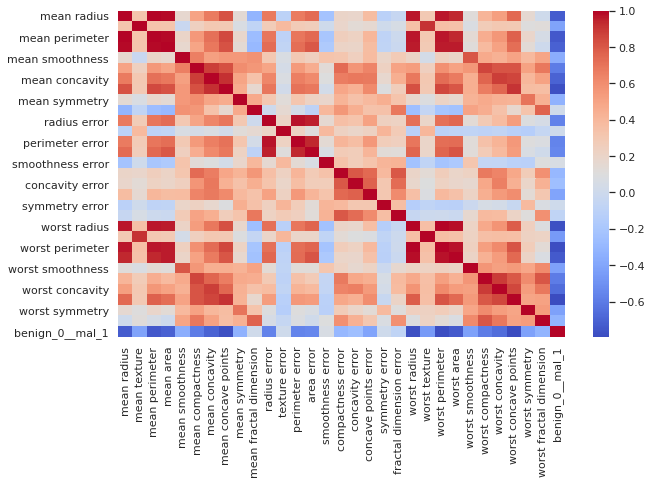

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

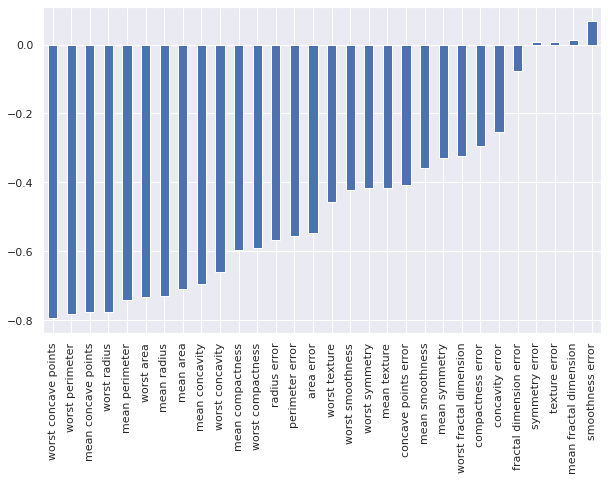

In [ ]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.show()

**Train Test Split**


In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


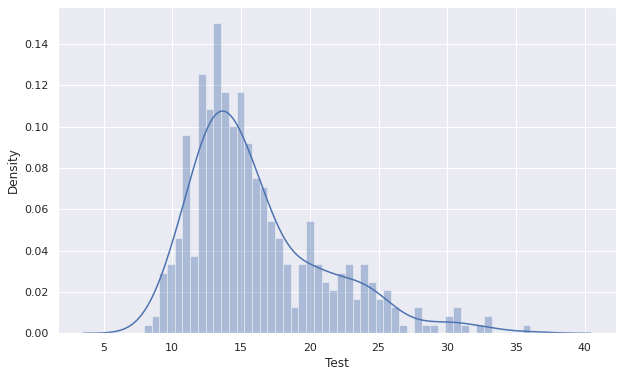

In [ ]:
#não faz parte do exercicio, apenas para verificar efeito da normalização minmax
plt.figure(figsize=(10,6))
sns.distplot(pd.DataFrame({'Test': X_train[:,20]})['Test'],bins=50)
plt.show()

**Scaling Data**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


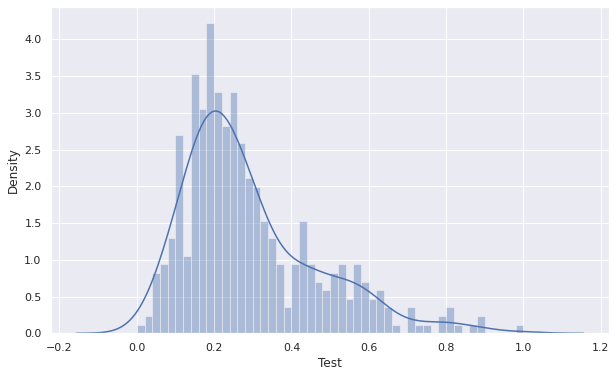

In [ ]:
#não faz parte do exercicio, apenas para verificar efeito da normalização minmax
plt.figure(figsize=(10,6))
sns.distplot(pd.DataFrame({'Test': X_train[:,20]})['Test'],bins=50)
plt.show()


**Creating the Model**


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
model = Sequential()

#criando 3 camadas de neurônios: a primeira com 30, a segunda com 15, e a terceira com 1 neurônios. 
#Todos conectados com todos da camada seguinte (Dense). 
#função de ativação das primeiras camadas: "ReLU"
#função de ativação da ultima camada: "Sigmoid" pois se trata de um problema de classificação (saída binária)
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='adam' ,loss='binary_crossentropy')

**Training the Model**

**Example One: Choosing too many epochs and overfitting!**


In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1)

In [ ]:
losses = pd.DataFrame(model.history.history)

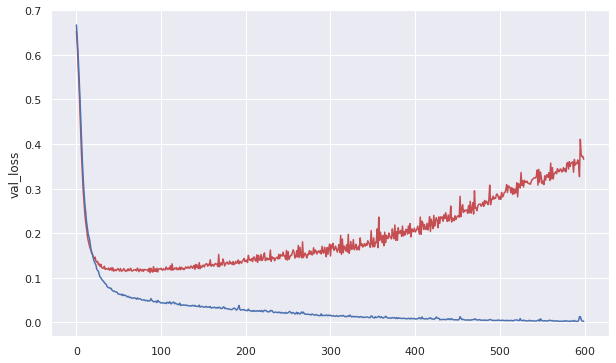

In [ ]:
#exemplo claro de "overfitting"
plt.figure(figsize=(10,6))
sns.lineplot(data=losses, x= losses.index, y="val_loss",color='r')
sns.lineplot(data=losses, x= losses.index, y="loss", color='b')
plt.show()

**Example Two: Early Stopping**


In [ ]:
#criando o modelo novamente
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
#Monitorando a curva "val loss"
#mode='min' pois a variavel se trata de algo que queremos minimizar
#patience=25 pois apos detectar o "val loss" minimo, vai deixar passar mais 25 epochs antes de parar o treino
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6880 - val_loss: 0.6745
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6661 - val_loss: 0.6552
Epoch 3/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6438 - val_loss: 0.6295
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6118 - val_loss: 0.5903
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5684 - val_loss: 0.5469
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5221 - val_loss: 0.4992
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4751 - val_loss: 0.4487
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4319 - val_loss: 0.3996
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3887 - val_loss: 0.3545
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3421 - val_loss: 0.3165
Epoch 1

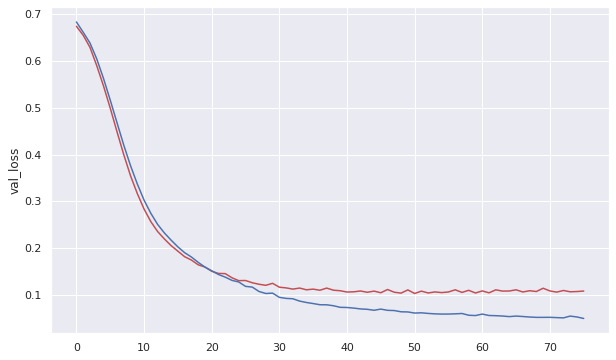

In [ ]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,6))
sns.lineplot(data=losses, x= losses.index, y="val_loss",color='r')
sns.lineplot(data=losses, x= losses.index, y="loss", color='b')
plt.show()

**Example Three: Adding in DropOut Layers**


In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) #metade dos neuronios dessa camada serão desligados aleatoriamente durante o treino, serve para evitar overfitting

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5)) #metade dos neuronios dessa camada serão desligados aleatoriamente durante o treino, serve para evitar overfitting

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6820 - val_loss: 0.6770
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6851 - val_loss: 0.6657
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6576 - val_loss: 0.6518
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6598 - val_loss: 0.6358
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6389 - val_loss: 0.6164
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6211 - val_loss: 0.5953
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5937 - val_loss: 0.5702
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5804 - val_loss: 0.5394
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5422 - val_loss: 0.5045
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5444 - val_loss: 0.4721
Epoch 11

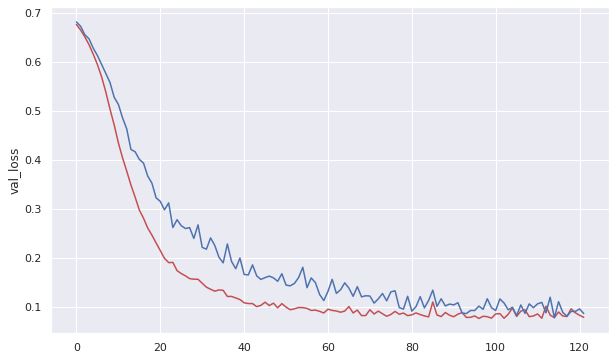

In [ ]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,6))
sns.lineplot(data=losses, x= losses.index, y="val_loss",color='r')
sns.lineplot(data=losses, x= losses.index, y="loss", color='b')
plt.show()

**Model Evaluation**


In [ ]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
